# Lab Assignment One: Exploring Table Data 

## CS 7324 Fall 2023
## Catherine Magee, Morgan Mote, Luv Patel



### ----------------------------------------------------------------------------------------------------------------------------------

## Buisness Understanding 

This exploratory analysis focuses on COVID 19 data pulled from the Google Cloud Public Datasets Program. More Specifically, this dataset focuses on the census report in the US collected during the pandemic in 2021. The purpose of this dataset is to discover which states and counties are at highest risk for positive COVID 19 cases. 

This analysis is essential to flattening the curve or slowing the spread of postive COVID 19 cases because it surfaces not only the counties that are at the highest risk but also which demographic in that county needs the most assistance. Therefore this analysis can provide useful information to third parties such as hospitals in their distribution of personal protective equipment (PPE) such as masks. Therefore goal of this analysis is to predict which counties will be at the highest risk with the lowest amount of resources in the future. 


 ***************Answer this when further along in project ************************************************************         
Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?
Be specific and use your own words to describe the aspects of the data.

## Data Understanding

In order to decide the correct types for our features it was important to first divide them into qualitative (categorical) and quantitative (numerical).

The quantitative features are
The qualitative features are

Next we decided to divide the values into discrete vs continuous for the quantitative features and nominal vs ordinal for the qualitative features. In doing this we ensure that we select the best data types for our datasets features.

For the quantitative features in our dataset we decided that        were discrete counts. 
Next we decided that      are continous to support their float formatting in the original dataset. 
Lastly, for the qualitative features in our dataset we decided         is nominal and        is ordinal.

## Data Understanding 

#### Loading the Dataset

In [1]:
import pandas as pd

#CSV file is in the same directory as Python script
file_path = "COVID-19_cases_plus_census.csv"

# Read the CSV file into a DataFrame
cases = pd.read_csv(file_path)

# Now, 'cases' contains the data from the CSV file


### Attributes and their data types

 In order to decide the correct types for our features it was important to first divide them into qualitative (categorical) and quantitative (numerical).                                                                                          

The quantitative features are "confirmed_cases", "deaths", "total_pop", "median_income", "median age", "cases_per_1000", "deaths_per_1000", and "death_per_case".  The qualitative features are "county_name" and "state". 
    
Next we decided to divide the values into discrete vs continuous for the quantitative features and nominal vs ordinal for the qualitative features.  In doing this we ensure that we select the best data types for our datasets features. 
    
For the quantitative features in our dataset we decided that "confirmed_cases", "deaths" were discrete counts. Next we decided that "total_pop", "median_income", "median age", "cases_per_1000", "deaths_per_1000", and "death_per_case" are continous to support their float formatting in the original dataset. Lastly, for the qualitative features in our dataset we decided "county_name" and "state" are nominal. 

##### Below you can see a table of the relevant features in the dataset and their explanation. 

|Attribute|Description|
|-------|-----------|
|county_name|Name of each county|
|state|State in the Unites States. |
|confirmed_cases|Total confirmed COVID 19 cases in the county|
|deaths|Total deaths by COVID 19 in the county|
|total_pop|Total population in the county|
|median_income|Middle income value of the county|
|median_age| Middle age value for the county|
|cases_per_1000|Total confirmed cases of COVID-19 in county at time of record (per 1000 people)|
|deaths_per_1000|Total confirmed deaths by COVID-19 in county at time of record (per 1000 people)|
|death_per_case|County specific value of the amount of deaths / confirmed cases |


## Narrowing our dataset 
#### This represents only the relevant attributes with relevant values

In [2]:
# Filter rows with confirmed_cases > 0
cases = cases[cases['confirmed_cases'] > 0]

# Calculate rates per 1000 people 
# Rate calculation added as new attributes
cases['cases_per_1000'] = (cases['confirmed_cases'] / cases['total_pop']) * 1000
cases['deaths_per_1000'] = (cases['deaths'] / cases['total_pop']) * 1000
cases['death_per_case'] = cases['deaths'] / cases['confirmed_cases']

# Sort the DataFrame by confirmed_cases in descending order
cases = cases.sort_values(by='confirmed_cases', ascending=False)

#### Final dataset selection. 


In [3]:
# Select important attributes
selected_columns = ['county_name', 'state', 'confirmed_cases', 'deaths', 'total_pop', 'median_income', 'median_age', 'cases_per_1000', 'deaths_per_1000', 'death_per_case']
cases = cases[selected_columns]


#### Data types for the selected attributes

In [4]:
print(cases.dtypes)

county_name         object
state               object
confirmed_cases      int64
deaths               int64
total_pop          float64
median_income      float64
median_age         float64
cases_per_1000     float64
deaths_per_1000    float64
death_per_case     float64
dtype: object


### Final summary of dataframe and list of attributes. 

In [6]:
# Print the column names in the 'cases' DataFrame
print("These are the cases in the dataframe. \n" + str(cases.columns)+ "\n" + "\n")

# Print the first few rows in the resulting DataFrame
print(cases.head())

These are the cases in the dataframe. 
Index(['county_name', 'state', 'confirmed_cases', 'deaths', 'total_pop',
       'median_income', 'median_age', 'cases_per_1000', 'deaths_per_1000',
       'death_per_case'],
      dtype='object')


             county_name state  confirmed_cases  deaths   total_pop  \
287   Los Angeles County    CA          1002614   13936  10105722.0   
832          Cook County    IL           435888    8544   5238541.0   
245      Maricopa County    AZ           425844    6443   4155501.0   
430    Miami-Dade County    FL           347965    4622   2702602.0   
2782       Harris County    TX           286356    3825   4525519.0   

      median_income  median_age  cases_per_1000  deaths_per_1000  \
287         61015.0        36.0       99.212506         1.379021   
832         59426.0        36.4       83.207901         1.630988   
245         58580.0        36.0      102.477174         1.550475   
430         46338.0        39.5      128.751847         1.710204

## Verifying Data Quality 

#### Check for missing values. 

#### To check for missing values we ran two test. First we performed a generall check by summing all the null values in the selected dataframe by attribute. Which resulted in 0 for each attribute. Thus there were no missing values. For safe keeping we ran a second test to see if any of the columns contained a null value! Which returned an empty listed. Therefore there were no missing values in our dataset! 

#### If our dataset did have missing values it would be best to use imputation. By using imputation we could estimate a counties confirmed cases based on the total population value. If the total population value was the missing data our calculations for death per case, cases per 1000, and deaths per 1000 would be ruined. At this point we would opt for deleting the missing instance to avoid skewing our dataframe. 

In [9]:
missing_values = cases.isnull().sum()
print("Missing Values:")
print(str(missing_values)+ "\n")

print("These are the columns with missing data!" + str(cases.columns[cases.isnull().any()].tolist()))


Missing Values:
county_name        0
state              0
confirmed_cases    0
deaths             0
total_pop          0
median_income      0
median_age         0
cases_per_1000     0
deaths_per_1000    0
death_per_case     0
dtype: int64

These are the columns with missing data![]


#### Check for Duplicate Data

#### Below we use one of python pandas built in functions to check for duplicated data. Here you can see our dataframe is free of duplicates because the dataframe that was returned is empty! 

In [10]:
# python pandas duplicated function
duplicates = cases.duplicated()

# If there is a empty frame then there are no duplicates. 
print(cases[duplicates])

Empty DataFrame
Columns: [county_name, state, confirmed_cases, deaths, total_pop, median_income, median_age, cases_per_1000, deaths_per_1000, death_per_case]
Index: []


#### Simple statistics of our dataframe.

In [11]:
# have the 'cases_sel' DataFrame
summary = cases.describe()

# Print the summary statistics
print(summary)

       confirmed_cases        deaths     total_pop  median_income  \
count     3.139000e+03   3139.000000  3.139000e+03    3139.000000   
mean      7.566138e+03    124.945524  1.022627e+05   49736.142083   
std       2.811232e+04    481.075014  3.284340e+05   13145.573334   
min       1.000000e+00      0.000000  7.400000e+01   19264.000000   
25%       7.985000e+02     12.000000  1.097100e+04   41120.000000   
50%       1.917000e+03     32.000000  2.571400e+04   48038.000000   
75%       4.955500e+03     77.000000  6.752450e+04   55758.000000   
max       1.002614e+06  13936.000000  1.010572e+07  129588.000000   

        median_age  cases_per_1000  deaths_per_1000  death_per_case  
count  3139.000000     3139.000000      3139.000000     3139.000000  
mean     41.148901       76.850959         1.336791        0.017567  
std       5.372906       28.503892         0.922729        0.011150  
min      21.600000        2.461564         0.000000        0.000000  
25%      37.900000       58.

## Visualize Missing Data 

#### The bar chart below gives the viewer an idea of how many missing values there are in each attribute. Each bar represents an attribute in the dataframe. If there is a missing value present in an attribute the bar will dip in height or lower its y axis value. 

<Axes: >

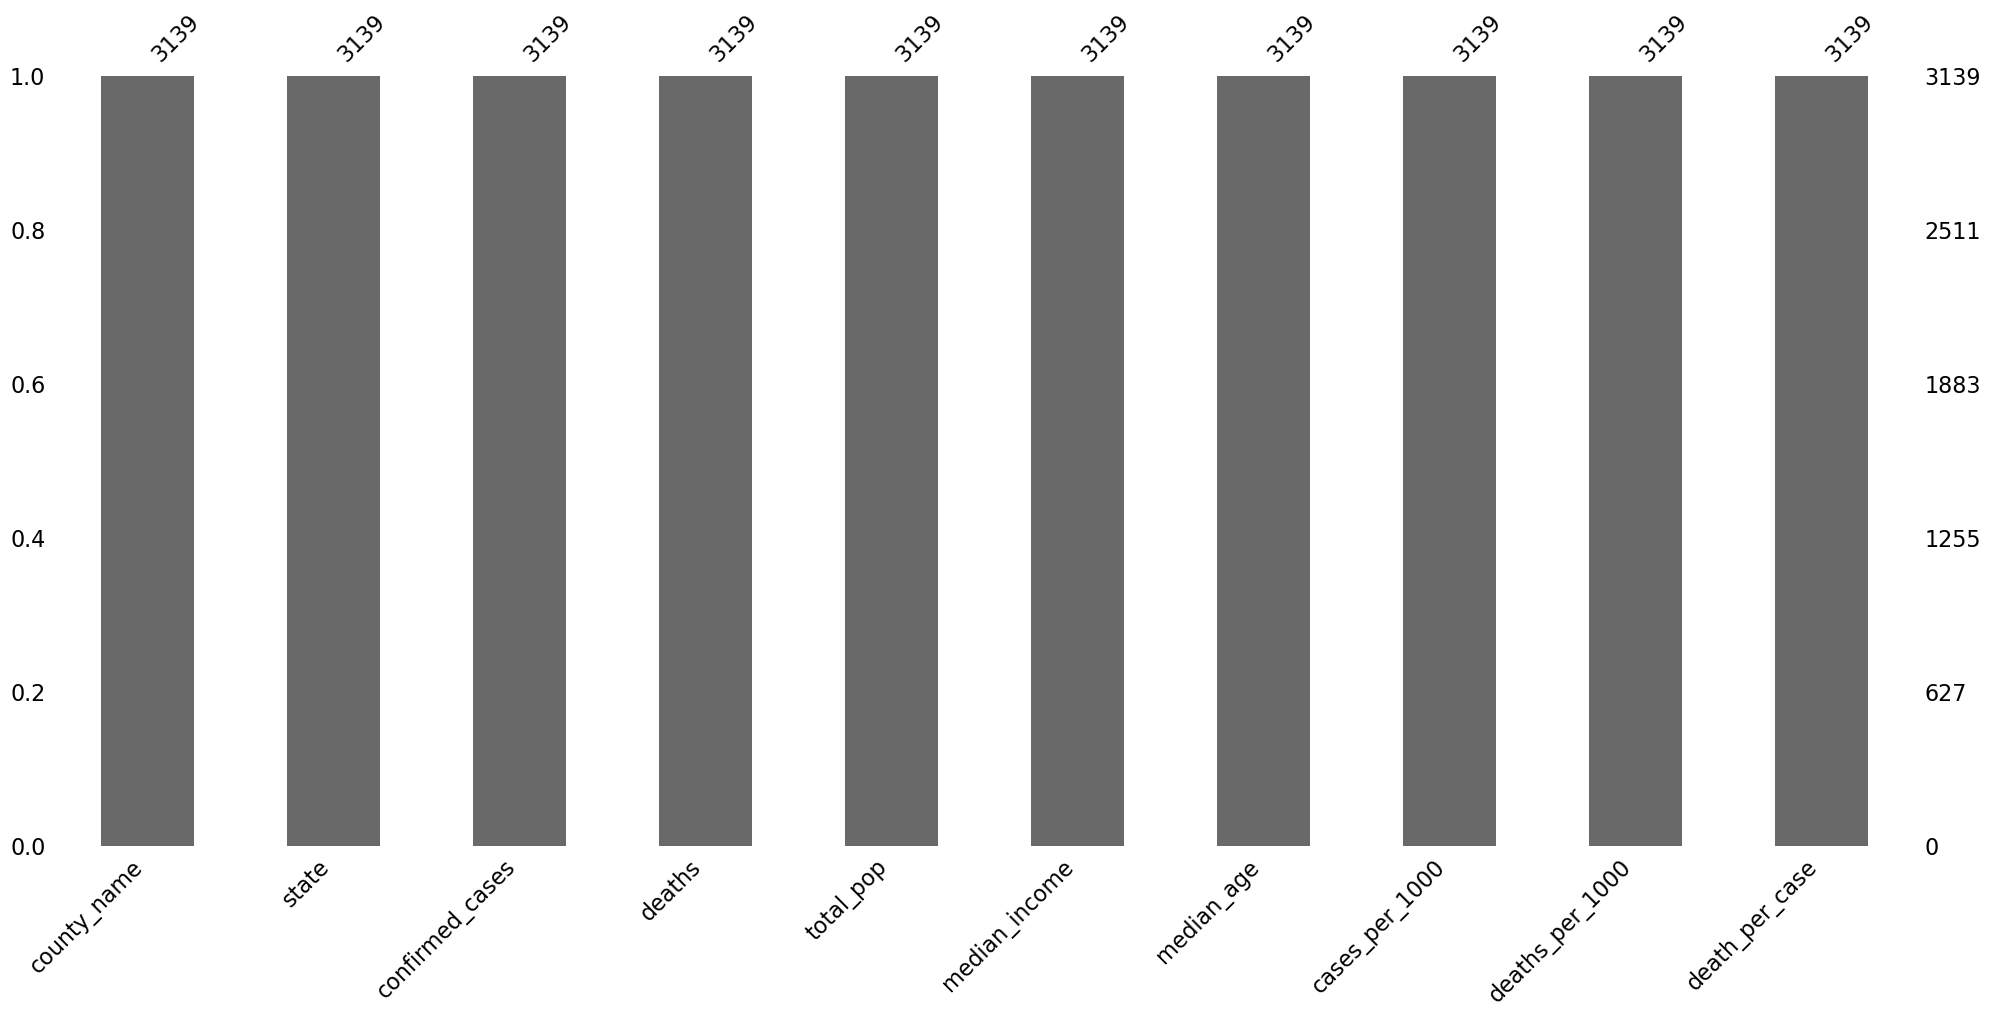

In [12]:
import missingno as msno

msno.bar(cases)

## Visualize the distribution of the dataframe

#### In the following visualization we use distribution plots to further visualize any outliers or skewness of the data. This giving us an overall view of the quality of our data. Below you will see three different ways to visualize the distribution of the dataset. 


### Historgram

#### This is a histogram representing the distribution of the median income in our dataset. Here you can see the frequency distribution of our population being grouped into each median income bin. In this visualization the higher the bin means the more people in our popualtion are grouped into that median income. 

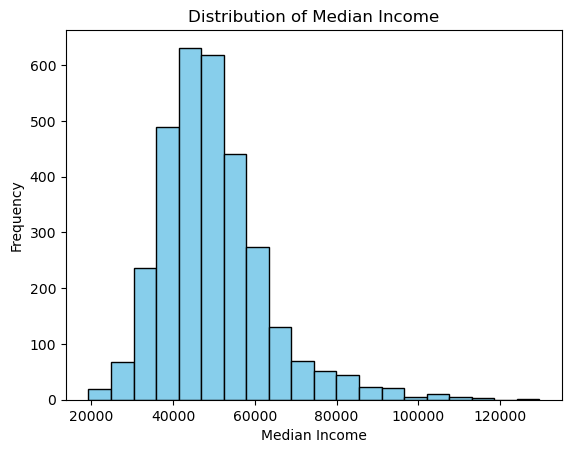

In [14]:
import matplotlib.pyplot as plt

# Visualization for 'median_income' column
plt.hist(cases['median_income'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Distribution of Median Income')
plt.show()

### Box Plot

#### This is a box plot representing the distribution of the median age in our dataset. Here you can see our dataframe has about 4 groups of outliers 2 represent the older population in the state and the other 2 represnt the younger group in the state. The 50th percential of the median age in our dataset is 42 years old while the 25th percential is about 37 and the 75th percential is about 45 years old. This means that 25% of the data is made up of 37 and lower ages while 75% of the data represents ages 45 plus. This proves that most COVID 19 cases are the older population in the state. 

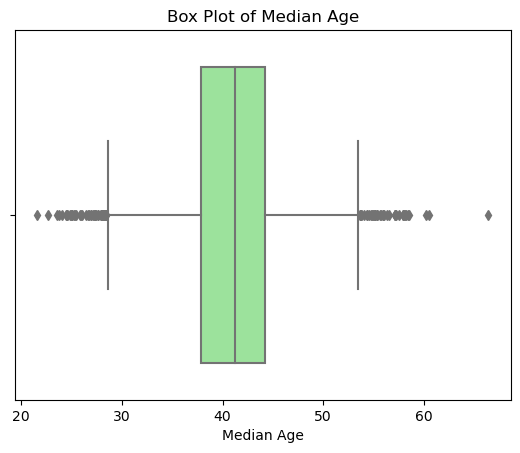

In [15]:
import seaborn as sns

# Visualization for 'median_age' column
sns.boxplot(x=cases['median_age'], color='lightgreen')
plt.xlabel('Median Age')
plt.title('Box Plot of Median Age')
plt.show()

### Bar Chart 

#### This is a simple bar chart representing the states as categories. This means each state has its own bar below.  The height of the bar represents the count of confirmed COIVD 19 cases in that state. Here you can see some distribution in our data in that not every state has the same count of positive COVID 19 cases. Unfortunately Texas was the highest count of COVID 19 cases. 

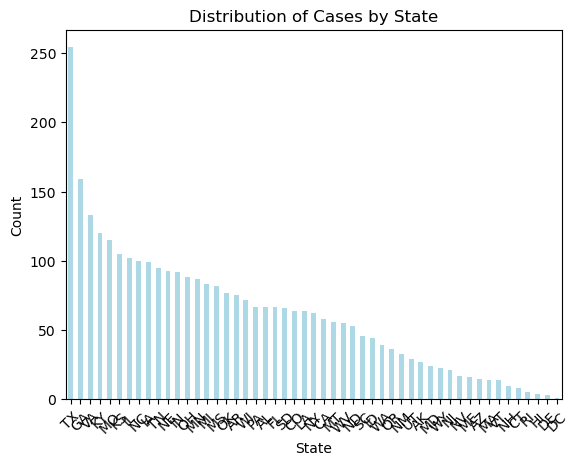

In [33]:
# Visualization for 'state' column (assuming 'state' is categorical)
cases['state'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Cases by State')
plt.xticks(rotation=45)
plt.show()

### Kernel Density Plot (KDE)

#### Kernel density is used to calculate the density of attributes in a neighborhood around the attributes. Further a smaller bandwidth reprents less smoothing and a higer bandwidth represents more smoothing or less peaks in the visualization. For further understanding we have included one visualization with less smoothing than the other.  Also it is important to note that it did not take a high bandwidth to smooth our data. Therefore our dataframe is distributed but not at a rate that we will struggle with dimensionality. 

Text(0.5, 1.0, 'Kernel Density, 0.01 bandwidth, Less smoothing')

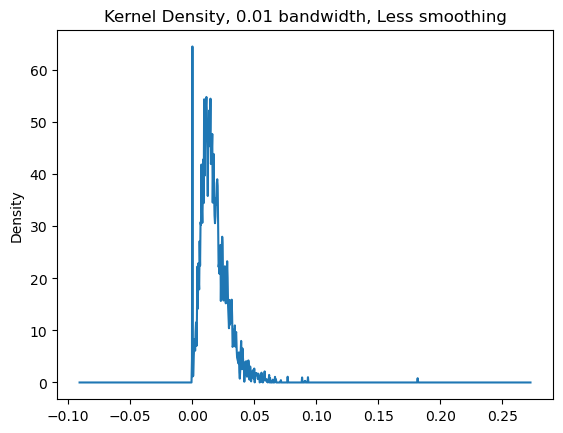

In [29]:
# Visualization for 'death_per_case' attribute
# Different implementation using seaborn both work! Just one example from class and one exmaple from research!
# sns.displot(cases, x="death_per_case", kind="kde")

cases.death_per_case.plot.kde(bw_method=.01)
plt.title('Kernel Density, 0.01 bandwidth, Less smoothing')


Text(0.5, 1.0, 'Kernel Density, 0.2 bandwidth, More smoothing')

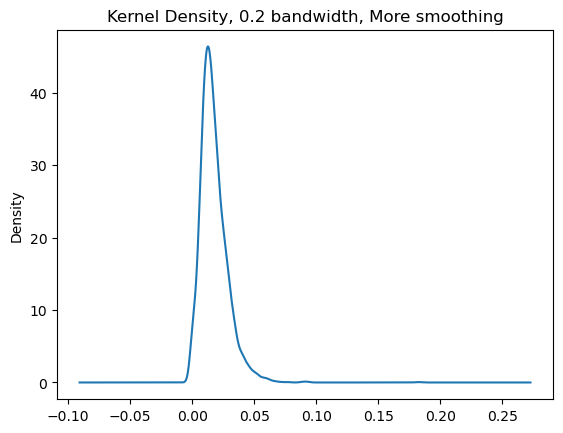

In [31]:
cases.death_per_case.plot.kde(bw_method=.2)
plt.title('Kernel Density, 0.2 bandwidth, More smoothing')

## Further Data Visualizations

- plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. Describe anything meaningful or potentially useful you discover from these visualizations. These may also help to understand what data is missing or needs imputation. Note: You can also use data from other sources to bolster visualizations. Visualize at least five plots, at least one categorical. 
- ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data.  
- IMPORTANT: Interpret the implications for each visualization. 

#### Normalization of the dataframe. 

In [51]:
# final selected dataframe
cases_sel = cases[selected_columns]

# Normalize attributes by population
population_columns = ['total_pop','cases_per_1000', 'deaths_per_1000',
       'death_per_case']

cases_sel[population_columns] = cases_sel[population_columns].div(cases_sel['total_pop'], axis=0)

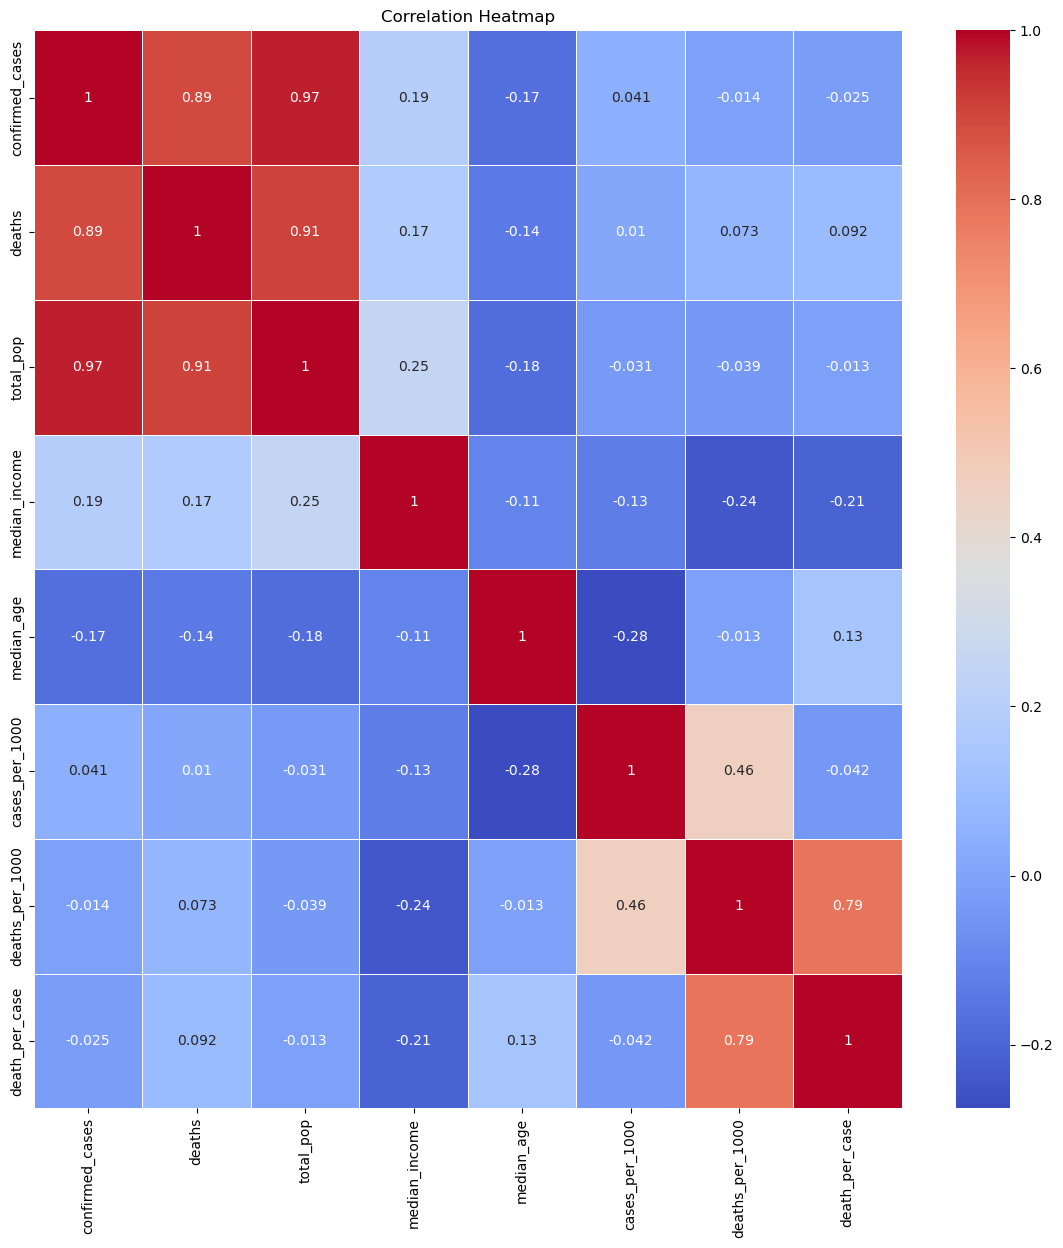

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns and drop rows with missing values
numeric_cols = cases_sel.select_dtypes(include=['number'])
numeric_cols = numeric_cols.dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

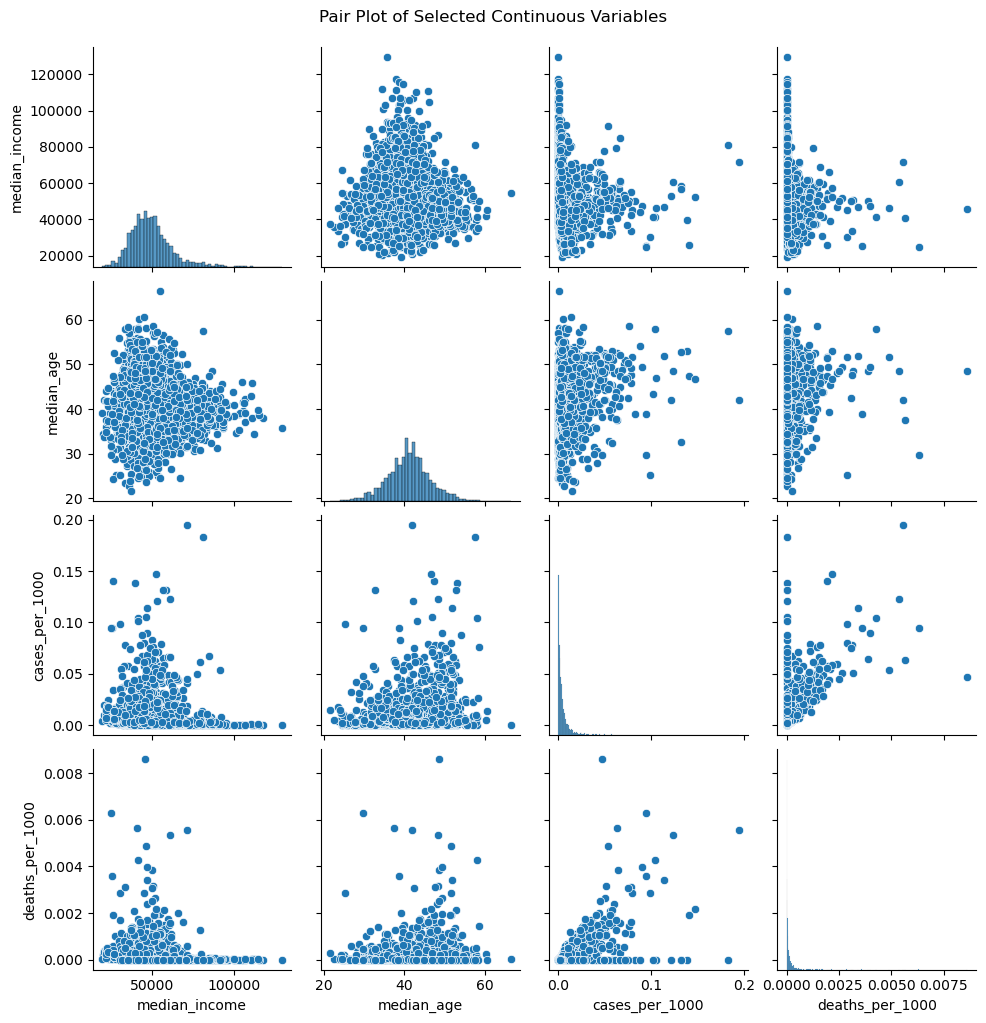

In [26]:
# Visualization using Seaborn's pairplot
sns.pairplot(cases_sel[['median_income', 'median_age', 'cases_per_1000', 'deaths_per_1000']])
plt.suptitle('Pair Plot of Selected Continuous Variables', y=1.02)
plt.show()

## Exceptional Work

- You have free reign to provide any additional analyses. 
- One idea (required for 7000 level students): implement dimensionality reduction using uniform manifold approximation and projection (UMAP), then visualize and interpret the results. 
- Give an explanation of UMAP dimensionality reduction methods. 

### The overall quality of the report as a coherent, useful, and polished product will be reflected here. 
- Does it make sense overall? 
- Do your visualizations answer the questions you put forth in your business analysis? 
- Do you properly and consistently cite sources and annotate changes made to base code? 
- Do you provide specific reasons for your assumptions? 
- Do subsequent questions follow naturally from initial exploration?


In [35]:
!pip install umap-learn

     ---------------------------------------- 88.2/88.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82814 sha256=c600d2d2af18f9185e03b287f61212fd52b4d57b17dd249b9aa12ed2a58b7366
  Stored in directory: c:\users\morga\appdata\local\pip\cache\wheels\f4\3e\1c\596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=39e97884b43cbf9fdbef76649cfab8465cf37333a3e82104d8d9060dae6868f0
  Stored in directory: c:\users\morga\appdata\local\pip\cache\wheels\12\f9\4d\ec5ad1c823c710fcc4473669fdcffc8891f4bc398c841af22e
Successfully built umap-learn pynndescent


In [36]:
import pandas as pd
import umap
import matplotlib.pyplot as plt

# Initialize the UMAP reducer with desired parameters
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')

# Fit and transform the data to lower dimensions
umap_result = reducer.fit_transform(cases_sel[['median_income', 'median_age', 'cases_per_1000', 'deaths_per_1000']])

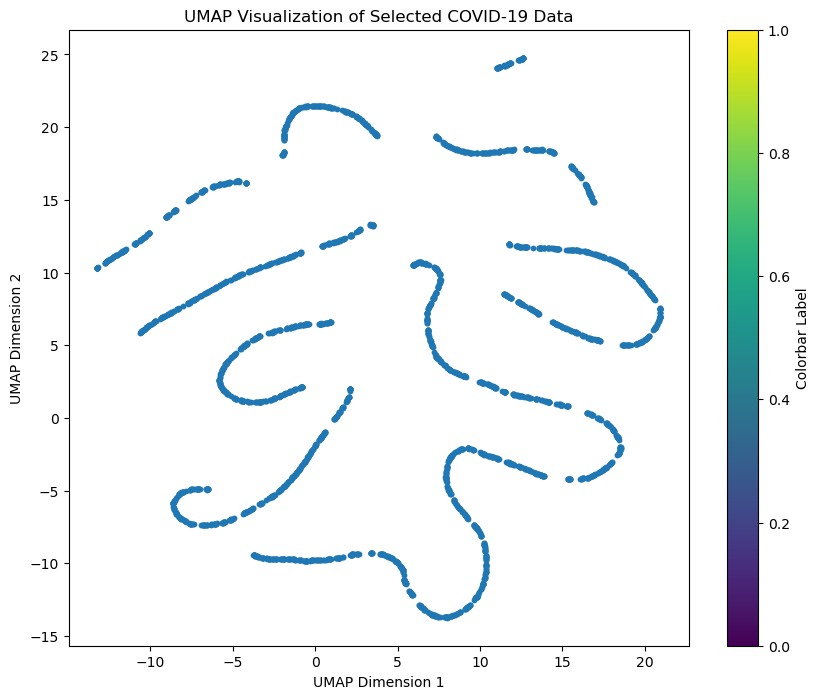

In [37]:
# Create a scatter plot to visualize the data in the reduced UMAP space
plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], cmap='viridis', s=10)
plt.title('UMAP Visualization of Selected COVID-19 Data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Colorbar Label')  # You can label the colorbar as needed
plt.show()